In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



/kaggle/input/nek-310-lecture-9-v-2/OJ.csv


In [ ]:
import matplotlib.pyplot as plt

oj=pd.read_csv('OJ.csv')

In [3]:
oj.head()
#oj['Purchase'].value_counts()
#oj['Store7'].value_counts()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [6]:
#Creating dummies
cat_vars=['Purchase','Store7']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(oj[var], prefix=var)
    oj1=oj.join(cat_list)
    oj=oj1
    

data_vars=oj.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [7]:
oj=oj[to_keep]
oj=oj.drop(['Unnamed: 0','Purchase_CH','Store7_No'],axis=1)
oj.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


In [6]:
import statsmodels.api as sm 


# defining the dependent and independent variables 
X_CH = oj['LoyalCH'] 
Y_CH=oj['Purchase_MM']
   
# building the model and fitting the data 
log_reg = sm.Logit(Y_CH, X_CH).fit(maxiter=10000) 
# printing the summary table 
print(log_reg.summary()) 

Optimization terminated successfully.
         Current function value: 0.562501
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Purchase_MM   No. Observations:                 1070
Model:                          Logit   Df Residuals:                     1069
Method:                           MLE   Df Model:                            0
Date:                Thu, 06 Feb 2025   Pseudo R-squ.:                  0.1587
Time:                        07:57:34   Log-Likelihood:                -601.88
converged:                       True   LL-Null:                       -715.43
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LoyalCH       -1.7902      0.121    -14.836      0.000      -2.027      -1.554


In [8]:
oj1=oj.columns.values.tolist()
y=oj['Purchase_MM']
X=oj.drop(['Purchase_MM'],axis=1)

from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_std, y,
                                                   test_size=0.33,
                                                   random_state=0,
                                                   stratify=y)

In [9]:
from sklearn.linear_model import LogisticRegressionCV
model =LogisticRegressionCV(Cs=np.linspace(0.001,0.01,100), fit_intercept=True, cv=5, dual=False, 
                   intercept_scaling=1, l1_ratios=np.linspace(0.001,0.001,1), refit=True, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='elasticnet',
                   random_state=0, solver='saga', tol=0.0001, verbose=0).fit(x_train, y_train)

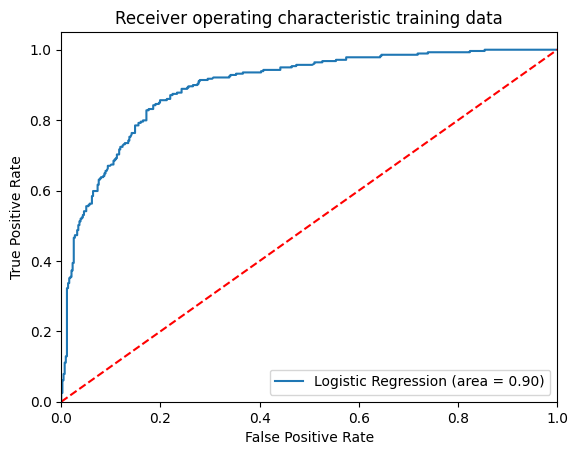

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_train = roc_auc_score(y_train, model.predict_proba(x_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr_train, tpr_train, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic training data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

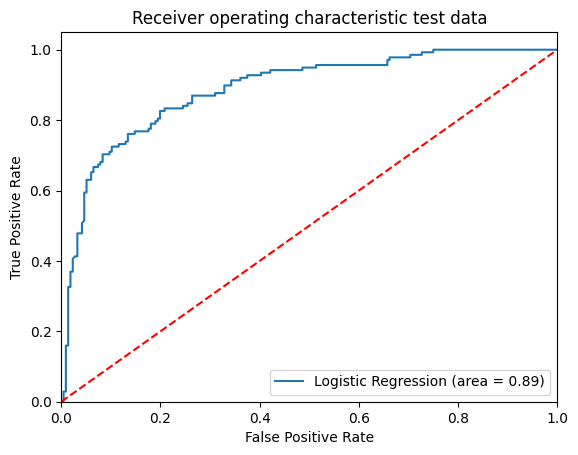

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_test = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr_test, tpr_test, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [16]:
df_x_test=pd.DataFrame(x_test)
from sklearn.inspection import permutation_importance
result = permutation_importance(model, df_x_test, y_test,
                            n_repeats=30,
                            random_state=0)


In [17]:
df=pd.concat([pd.DataFrame({'Variable': pd.DataFrame(X).columns.tolist()}),pd.DataFrame({'Importance':result.importances_mean})],axis=1)
df1=df.sort_values(by='Importance',ascending=False)
df1.head(10)

,Variable,Importance
8,LoyalCH,0.217420
1,StoreID,0.007345
16,Store7_Yes,0.004896
7,SpecialMM,0.001883
13,PctDiscCH,0.001412
4,DiscCH,0.001224
11,PriceDiff,0.000565
2,PriceCH,0.000000
15,STORE,0.000000
0,WeekofPurchase,-0.000188


In [ ]:
feature_names_25 = [i for i in df1['Variable'][:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i for i in df1['Importance'][:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Logistic Regression Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

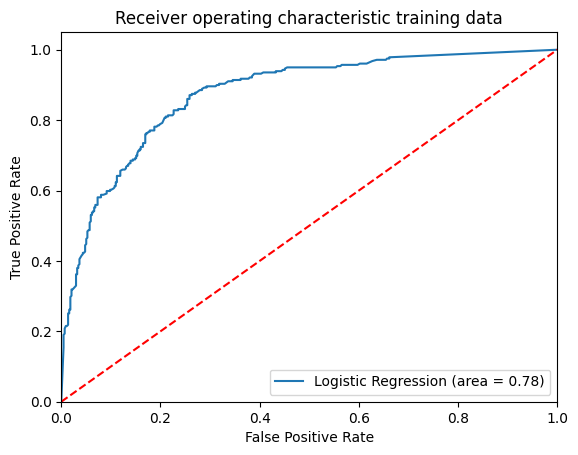

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
modelRF = RandomForestClassifier(n_estimators=100, 
                                 oob_score=True,
                                 bootstrap=True,
                               random_state=2, 
                               max_features ='sqrt' ,
                               n_jobs=-1, verbose = 0).fit(x_train, y_train)


# Fit on training data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc_train = roc_auc_score(y_train, np.argmax(modelRF.oob_decision_function_,axis=1))
fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(y_train, modelRF.oob_decision_function_[:,1])
plt.figure()
plt.plot(fpr_train_RF, tpr_train_RF, label='Logistic Regression (area = %0.2f)' % RF_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic training data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

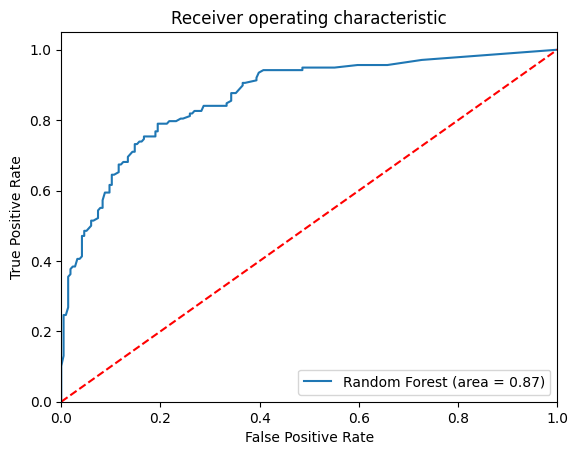

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, modelRF.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, modelRF.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

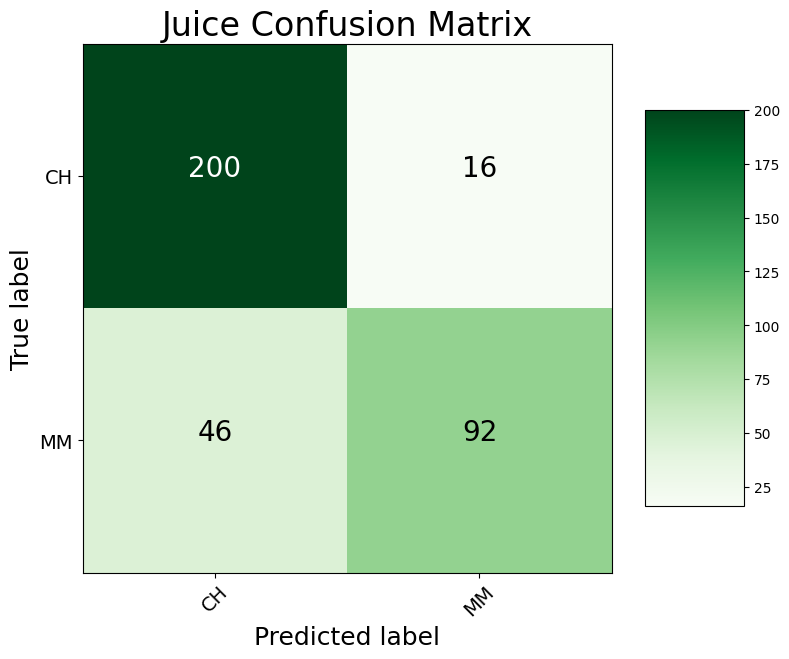

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        
        plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, model.predict(x_test))
plot_confusion_matrix(cm, classes = ['CH', 'MM'],
                      title = 'Juice Confusion Matrix')

In [22]:
df_x_test=pd.DataFrame(x_test)
from sklearn.inspection import permutation_importance
result = permutation_importance(modelRF, df_x_test, y_test,
                            n_repeats=30,
                            random_state=0)

In [23]:
df=pd.concat([pd.DataFrame({'Variable': pd.DataFrame(X).columns.tolist()}),pd.DataFrame({'Importance':result.importances_mean})],axis=1)
df1=df.sort_values(by='Importance',ascending=False)
df1.head(10)

,Variable,Importance
8,LoyalCH,0.206591
15,STORE,0.004331
0,WeekofPurchase,0.002919
4,DiscCH,0.001883
5,DiscMM,0.001789
13,PctDiscCH,0.001224
7,SpecialMM,0.000188
11,PriceDiff,0.000094
16,Store7_Yes,-0.000282
2,PriceCH,-0.000753
